### MACHINE LEARNING (ML) INNOVATIVE ASSIGNMENT

### COURSE CODE : 2CS501

### CUSTOMER CHURN PREDICTION

### 21BCE006 ACHARYA VARAD
### 21BCE081 HALPATI SAHIL
### 22BCE501 VISHAL ARYA
### 22BCE508 PRATHAM GUPTA

## Preprocessing

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [23]:
# Customer Churn Prediction 
df = pd.read_csv('Churn_Modelling.csv')

In [24]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age   
0          1    15634602  Hargrave          619    France  Female   42  \
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember   
0       2       0.00              1          1               1  \
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [25]:
df.shape

(10000, 14)

In [26]:
# Delete RowNumber Customer Id , Surname
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [27]:
df.info()
# there is no null value in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [28]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts   
0          619    France  Female   42       2       0.00              1  \
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [29]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [30]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [31]:
# One hot encoding in the category data - geography and gender
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [32]:
df.head()
# the estimated salary and balance has large values 
# so we are going to scale this 

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard   
0          619   42       2       0.00              1          1  \
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany   
0               1        101348.88       1              False  \
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  
3            False        False  
4             True        False

In [33]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaling the x_test and x_traing
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)


### 1.GREDIENT DECENT CLASSIFFIER

In [35]:
# Import Necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')  # Replace 'your_dataset.csv' with your file's name

# Split features and target
X = data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = data['Exited']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical columns (change the list below with the actual categorical columns)
categorical_cols = ['Geography', 'Gender']

# Define the preprocessing steps
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_cols)],remainder='passthrough')

# Define the model and preprocess data
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss='log', max_iter=1000, random_state=42))
])


# Fit the model
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8115


C:\Users\vishal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [47]:
X_train

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts   
9254          686    France    Male   32       6       0.00              2  \
1561          632   Germany    Male   42       4  119624.60              2   
1670          559     Spain    Male   24       3  114739.92              1   
6087          561    France  Female   27       9  135637.00              1   
6669          517    France    Male   56       9  142147.32              1   
...           ...       ...     ...  ...     ...        ...            ...   
5734          768    France    Male   54       8   69712.74              1   
5191          682    France  Female   58       1       0.00              1   
5390          735    France  Female   38       1       0.00              3   
860           667    France    Male   43       8  190227.46              1   
7270          697   Germany    Male   51       1  147910.30              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
9254          1               1        179093.26  
1561          1               1        195978.86  
1670          1               0         85891.02  
6087          1               0        153080.40  
6669          0               0         39488.04  
...         ...             ...              ...  
5734          1               1         69381.05  
5191          1               1           706.50  
5390          0               0         92220.12  
860           1               0         97508.04  
7270          1               1         53581.14  

[8000 rows x 10 columns]

In [36]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1501  106]
 [ 271  122]]


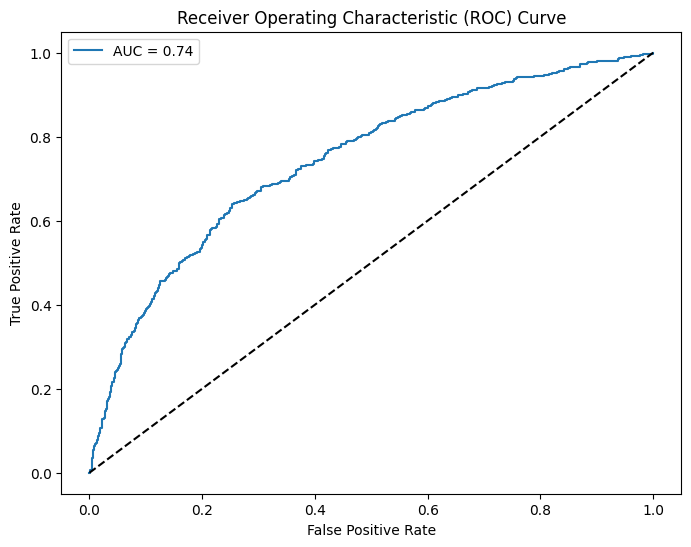

In [37]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


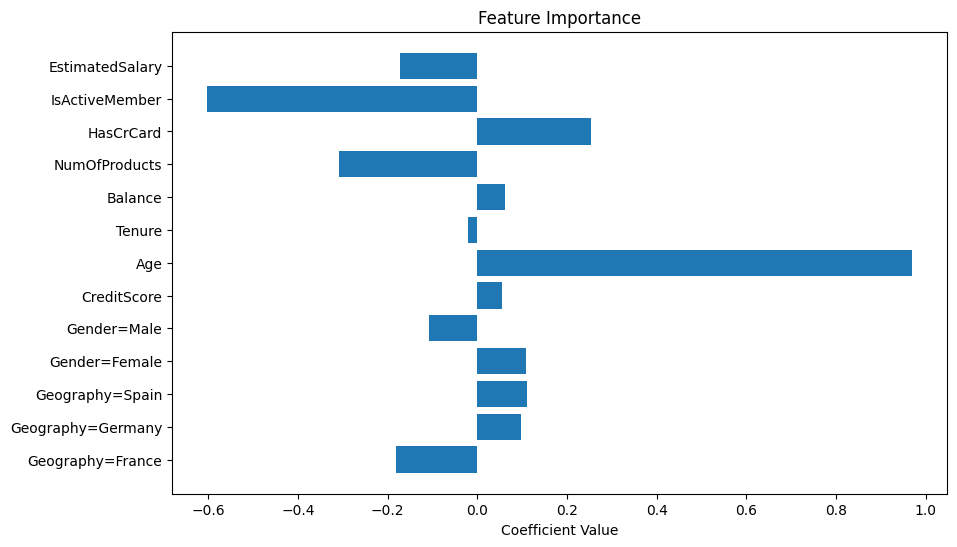

In [49]:
# Get the one-hot encoder from the preprocessor
onehot_encoder = model.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot']

# Get the categories for each categorical feature
categories = onehot_encoder.categories_

# Get the one-hot encoded feature names
categorical_features = [f"{col}={val}" for col, vals in zip(categorical_cols, categories) for val in vals]

# Combine the one-hot encoded feature names with the remaining numerical feature names
numerical_feature_names = list(X.drop(categorical_cols, axis=1).columns)
features = categorical_features + numerical_feature_names

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, coef)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()


# 2.LOGISTIC REGRESSION 

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe containing the dataset
# Features (X) and target (y)
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']]
y = df['Exited']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1543   64]
 [ 314   79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



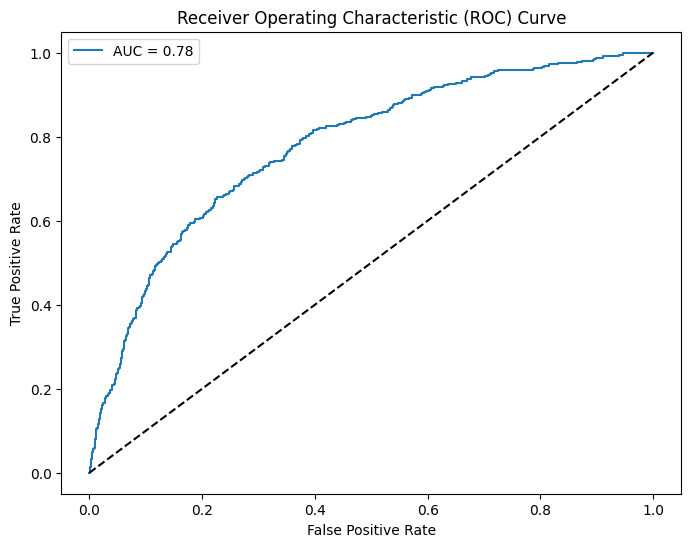

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# The closer the curve is to the top-left corner, the better the model performance.
# AUC (Area Under the Curve) gives an aggregate measure of the model's performance. Higher AUC indicates better performance.

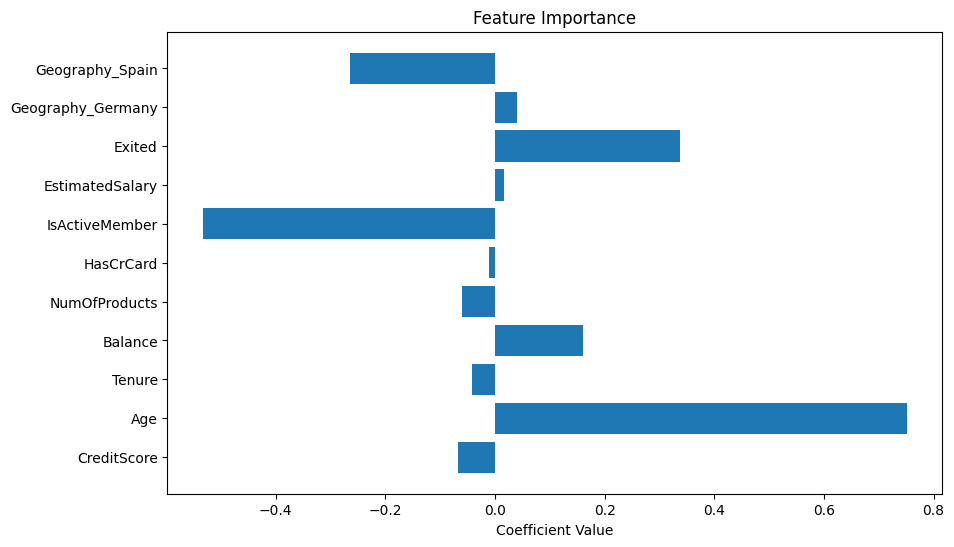

In [39]:
coef = model.coef_[0]
features = df.columns[:-1]

plt.figure(figsize=(10, 6))
plt.barh(features, coef)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()
# Positive coefficients indicate a positive correlation with the target variable.
# Negative coefficients indicate a negative correlation with the target variable.
# Larger absolute values suggest higher importance.

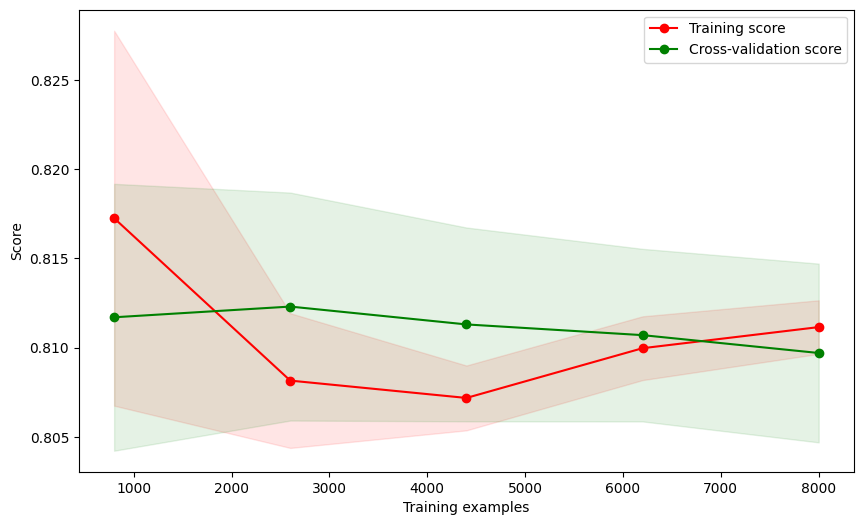

In [40]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()
# The gap between the training and cross-validation curves indicates overfitting or underfitting. Smaller gaps suggest better generalization.


# 3.Back propagation algorithm

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data and preprocess it
df = pd.read_csv('Churn_Modelling.csv')
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

X = df.drop(columns=['Exited'])
y = df['Exited'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build the ANN model
model = Sequential([
    Dense(units=64, activation='relu', input_dim=X_train.shape[1]),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=70, validation_split=0.2, verbose=1)



Epoch 1/70
200/200 [==============================] - 4s 8ms/step - loss: 0.4616 - accuracy: 0.7928 - val_loss: 0.4151 - val_accuracy: 0.8269
Epoch 2/70
200/200 [==============================] - 1s 4ms/step - loss: 0.3840 - accuracy: 0.8420 - val_loss: 0.3765 - val_accuracy: 0.8450
Epoch 3/70
200/200 [==============================] - 1s 4ms/step - loss: 0.3547 - accuracy: 0.8527 - val_loss: 0.3611 - val_accuracy: 0.8500
Epoch 4/70
200/200 [==============================] - 1s 4ms/step - loss: 0.3440 - accuracy: 0.8553 - val_loss: 0.3580 - val_accuracy: 0.8525
Epoch 5/70
200/200 [==============================] - 1s 4ms/step - loss: 0.3399 - accuracy: 0.8603 - val_loss: 0.3575 - val_accuracy: 0.8519
Epoch 6/70
200/200 [==============================] - 1s 4ms/step - loss: 0.3347 - accuracy: 0.8619 - val_loss: 0.3579 - val_accuracy: 0.8506
Epoch 7/70
200/200 [==============================] - 1s 4ms/step - loss: 0.3326 - accuracy: 0.8614 - val_loss: 0.3541 - val_accuracy: 0.8537
Epoch 

200/200 [==============================] - 1s 3ms/step - loss: 0.2496 - accuracy: 0.8950 - val_loss: 0.3726 - val_accuracy: 0.8537
Epoch 59/70
200/200 [==============================] - 1s 4ms/step - loss: 0.2472 - accuracy: 0.8942 - val_loss: 0.3855 - val_accuracy: 0.8512
Epoch 60/70
200/200 [==============================] - 1s 3ms/step - loss: 0.2482 - accuracy: 0.8922 - val_loss: 0.3761 - val_accuracy: 0.8594
Epoch 61/70
200/200 [==============================] - 1s 3ms/step - loss: 0.2470 - accuracy: 0.8973 - val_loss: 0.3765 - val_accuracy: 0.8544
Epoch 62/70
200/200 [==============================] - 1s 3ms/step - loss: 0.2448 - accuracy: 0.8956 - val_loss: 0.3767 - val_accuracy: 0.8569
Epoch 63/70
200/200 [==============================] - 1s 4ms/step - loss: 0.2429 - accuracy: 0.8975 - val_loss: 0.3778 - val_accuracy: 0.8581
Epoch 64/70
200/200 [==============================] - 1s 3ms/step - loss: 0.2429 - accuracy: 0.8983 - val_loss: 0.3804 - val_accuracy: 0.8631
Epoch 65/70

In [2]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

63/63 [==============================] - 1s 5ms/step - loss: 0.3990 - accuracy: 0.8425
Test Accuracy: 84.25%


In [3]:
model.layers[0].get_weights()

[array([[-3.33347112e-01, -4.65463579e-01, -4.06621248e-01,
          4.68127578e-01, -1.85674772e-01, -3.16694885e-01,
          9.22817439e-02, -5.36697879e-02, -3.33352029e-01,
          3.10576111e-01, -3.46865535e-01, -2.02896252e-01,
          1.88666075e-01, -1.01962462e-01, -3.61859053e-02,
          3.17089885e-01,  1.23142406e-01,  1.44002557e-01,
         -1.89056307e-01,  1.36069149e-01,  3.61503184e-01,
         -1.32958159e-01,  2.62070268e-01, -2.46511653e-01,
          3.24749440e-01,  2.69401878e-01,  2.37076014e-01,
         -8.28208178e-02,  6.77595019e-01, -3.18858862e-01,
         -1.79530963e-01,  3.50217313e-01, -4.82039936e-02,
          2.80312032e-01, -2.14929074e-01, -1.59159210e-02,
          3.16809624e-01, -5.29396117e-01,  4.81969006e-02,
         -1.25036344e-01, -6.74386546e-02, -2.17289001e-01,
         -7.98650086e-02, -1.20221332e-01, -1.34299472e-01,
          3.91448215e-02,  2.68760055e-01, -5.35383224e-02,
         -5.64694464e-01, -1.27536297e-0

In [4]:
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix

63/63 [==============================] - 0s 2ms/step


In [5]:
y_pred=[1 if  i > 0.5  else 0     for i in y_pred ]
print(confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred))

[[1453  142]
 [ 173  232]] 0.8425


In [6]:
y_logs=model.predict(X_test)
y_logs=np.where(y_logs>0.5,1,0)
print(confusion_matrix(y_test,y_logs),accuracy_score(y_logs,y_test))

63/63 [==============================] - 0s 2ms/step
[[1453  142]
 [ 173  232]] 0.8425


In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8425

63/63 [==============================] - 0s 2ms/step


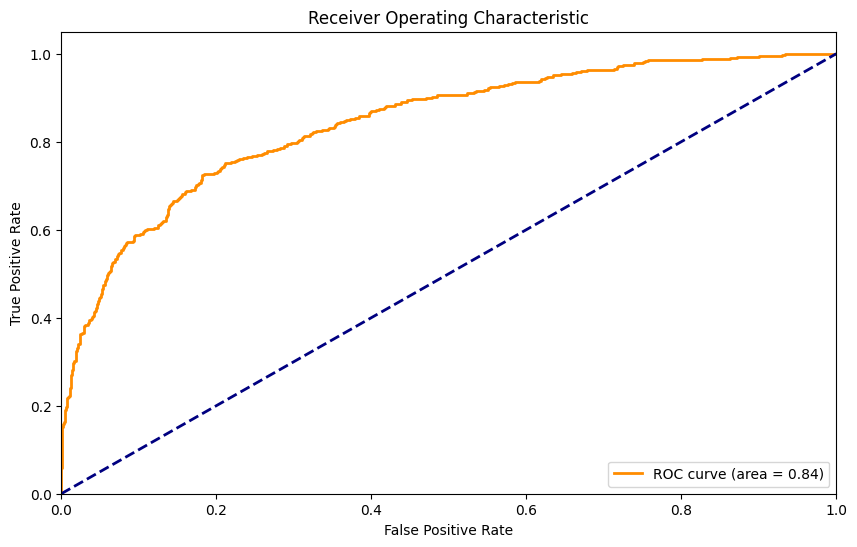

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc

y_probs = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [11]:
import pickle
pickle.dump(df, open('customer_churn.pkl','wb'))
with open('ann_model.pkl', 'wb') as file:
    pickle.dump(model, file)

### 4. USING RANDOM FOREST CLASSIFIER

In [115]:

# A Random Forest classifier is an ensemble learning method based on constructing multiple decision trees and merging their predictions.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming X contains your features and y contains the target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and print it
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.867
Confusion Matrix:
[[1549   58]
 [ 208  185]]


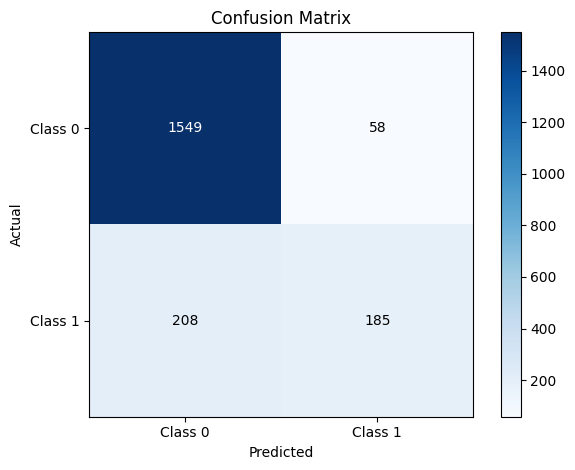

In [116]:
# Display the confusion matrix as a heatmap
def plot_confusion_matrix(conf_matrix):
    plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Class 0', 'Class 1']  # Replace with your class labels if different
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix)

Feature Importance Scores:
Feature 1: 0.0792
Feature 2: 0.3125
Feature 3: 0.0437
Feature 4: 0.1093
Feature 5: 0.2259
Feature 6: 0.0111
Feature 7: 0.0669
Feature 8: 0.0831
Feature 9: 0.0421
Feature 10: 0.0080
Feature 11: 0.0182


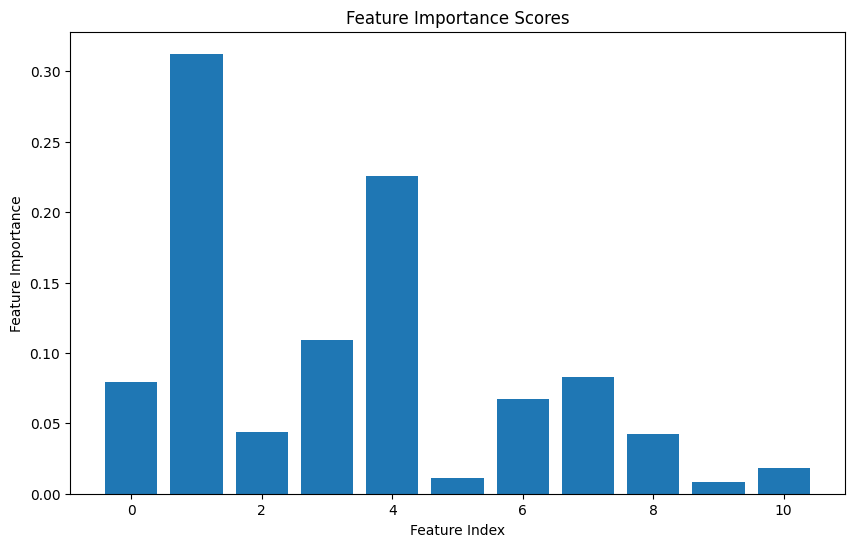

In [125]:
# Display feature importance scores
feature_importance = rf_classifier.feature_importances_
print("Feature Importance Scores:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance:.4f}")

# You can also visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

In [132]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load your dataset into a pandas DataFrame
df = pd.read_csv('Churn_Modelling.csv')

# Generate a profile report
profile = ProfileReport(df)

# Save the report to an HTML file
profile.to_file('Customer_churn.html')


Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.32it/s]
